In [1]:
%matplotlib inline
import seaborn as sns
sns.set()


# Regularization path of L1- Logistic Regression



Train l1-penalized logistic regression models on a binary classification
problem derived from the Iris dataset.

The models are ordered from strongest regularized to least regularized. The 4
coefficients of the models are collected and plotted as a "regularization
path": on the left-hand side of the figure (strong regularizers), all the
coefficients are exactly 0. When regularization gets progressively looser,
coefficients can get non-zero values one after the other.

Here we choose the liblinear solver because it can efficiently optimize for the
Logistic Regression loss with a non-smooth, sparsity inducing l1 penalty.

Also note that we set a low value for the tolerance to make sure that the model
has converged before collecting the coefficients.

We also use warm_start=True which means that the coefficients of the models are
reused to initialize the next model fit to speed-up the computation of the
full-path.


Automatically created module for IPython interactive environment
Computing regularization path ...
This took 0.067s


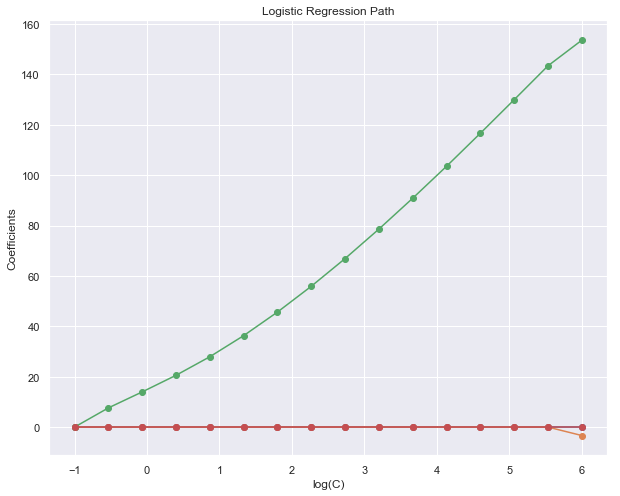

In [2]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # Normalize X to speed-up convergence

# #############################################################################
# Demo path functions

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.figure(figsize=(10, 8))
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()